# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t ,norm, ttest_ind
from numpy.random import seed

In [2]:
import os
path="D:\SPRINGBOARD_1\_Unit_11\Frequency Case Study\Frequentist Case Study"
medical = pd.read_csv(os.path.join(path,r'insurance2.csv'))

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
df=medical
print(df['insuranceclaim'].unique())
df.dtypes

[1 0]


age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

13270.422265141257 --- 12105.484975561612


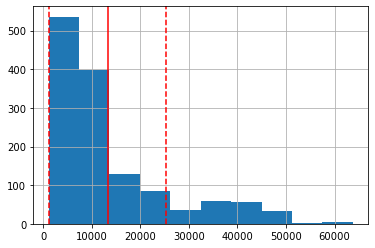

In [6]:
medical['charges'].hist()
mean=medical['charges'].mean()
# std1=medical['charges'].std()
std=np.std(medical['charges'])
print(mean,"---",std)
# print(np.mean(medical['charges']),"---",np.std(medical['charges']))
_ = plt.axvline(mean, color='r')
_ = plt.axvline(mean+std, color='r', linestyle='--')
_ = plt.axvline(mean-std, color='r', linestyle='--')

In [7]:
print("Inference : The standard deviation seems to be very large meaning that the charges are varying a lot")

Inference : The standard deviation seems to be very large meaning that the charges are varying a lot


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

Hypothesis Testing 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Since the administrator asserts that the average is below 12000 which is less than the calculated mean 13270 , 
we go for a one-sided (left tailed) interval

Null Hypothesis : Ho=Mean = 13270 or Mean > 12000
    
Alternative Hypothesis : Ha=Mean < 12000    

In [8]:
alpha=0.05 # one-sided test
Zc = 0.5 - alpha
print("Critical value of Z i.e. Zc =",Zc)

Critical value of Z i.e. Zc = 0.45


In [9]:
# From Z score table , Zscore for the value 0.45 is 1.6 ; z-table reference - https://www.statisticshowto.com/tables/z-table/
zscore=1.6
Upper_CI =mean + (zscore * (std/np.sqrt(1338)))
Lower_CI =mean - (zscore * (std/np.sqrt(1338)))
print("95% Confidence Interval is = [",Upper_CI,",",Lower_CI,"]")

95% Confidence Interval is = [ 13799.932207390992 , 12740.912322891521 ]


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [10]:

insured_new=df.loc[df['insuranceclaim'] == 1, 'charges'].values
notinsured_new=df.loc[df['insuranceclaim'] == 0, 'charges'].values
insured=insured_new
notinsured=notinsured_new

In [11]:
# insured=[]
# insured.append(df.loc[df['insuranceclaim'] == 1, 'charges'])
# notinsured=[]
# notinsured.append(df['charges'][df['insuranceclaim']==0])
# insured=np.array(insured)[0]
# notinsured=np.array(notinsured)[0]
# print(insured,"-----",notinsured)

In [12]:
n0=df.loc[df['insuranceclaim'] == 1, 'charges'].count()
n1=df.loc[df['insuranceclaim'] == 0, 'charges'].count()
print(n0,"---",n1)
x0=np.mean(insured)
x1=np.mean(notinsured)
s0=np.std(insured)
s1=np.std(notinsured)
print("Insured : Mean =",x0,"Std =",s0)
print("NotInsured : Mean =",x1,"Std =",s1)

783 --- 555
Insured : Mean = 16423.928276537677 Std = 14036.956250260417
NotInsured : Mean = 8821.421892306305 Std = 6440.699841605235


\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}} ;   t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation} 

Calculated Results :

In [13]:
n=((n0-1)*(s0**2)) + ((n1-1)*(s1**2))
d=n0+n1-2
sp=np.sqrt(n/d)
print("Calculated Pooled Variance =",sp)
t=(x0-x1)/(sp*np.sqrt((1/n0)+(1/n1)))
print("Calculated t-statistic =",t)
print("\n Degrees of Freedom =",d)

Calculated Pooled Variance = 11512.282899205748
Calculated t-statistic = 11.901306943555388

 Degrees of Freedom = 1336


Library Results :

In [14]:
# rvs1 = norm.rvs(loc=16423.93,scale=14036.95,size=783)
# rvs5 = norm.rvs(loc=8821.42,scale=6440.70,size=555)
print(ttest_ind(insured_new, notinsured_new))

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)


Repeating the procedure with samples :

In [15]:
seed(47)
sampleIns=np.random.choice(insured,10)
sampleNotIns=np.random.choice(notinsured,10)
print(sampleIns,"---\n",sampleNotIns)
n0=10
n1=10
print(n0,"---",n1)
x0=np.mean(sampleIns)
x1=np.mean(sampleNotIns)
s0=np.std(sampleIns)
s1=np.std(sampleNotIns)
print("Insured : Mean =",x0,"Std =",s0)
print("NotInsured : Mean =",x1,"Std =",s1)
n=((n0-1)*(s0**2)) + ((n1-1)*(s1**2))
d=n0+n1-2
sp=np.sqrt(n/d)
print("Calculated Pooled Variance =",sp)
t=(x0-x1)/(sp*np.sqrt((1/n0)+(1/n1)))
print("Calculated t-statistic =",t)
print("\n Degrees of Freedom =",d)
print("\nFrom the t-table , considering the degrees of freedom of",d," and checking against the t-statistic of",t,"we find that the tail probability ,p-value is = ~0.40")
print("( p-value taken from table considering 2-tailed test since the hypothesis concerns the equality of the means and doest not state whether to be > or < than a particular value)")

[34779.615   10231.4999   1149.3959   4889.0368  11093.6229  39774.2763
 10226.2842  11938.25595  7050.0213   2404.7338 ] ---
 [ 7742.1098   6250.435    4934.705    6455.86265  5253.524   19933.458
 23563.01618  6360.9936   2137.6536  11552.904  ]
10 --- 10
Insured : Mean = 13353.674204999998 Std = 12505.873686664736
NotInsured : Mean = 9418.466183 Std = 6607.737982966311
Calculated Pooled Variance = 10001.47683890607
Calculated t-statistic = 0.8798093306145106

 Degrees of Freedom = 18

From the t-table , considering the degrees of freedom of 18  and checking against the t-statistic of 0.8798093306145106 we find that the tail probability ,p-value is = ~0.40
( p-value taken from table considering 2-tailed test since the hypothesis concerns the equality of the means and doest not state whether to be > or < than a particular value)


In [16]:
print(ttest_ind(sampleIns,sampleNotIns))

Ttest_indResult(statistic=0.8346604174229887, pvalue=0.4148498177097526)


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
Z-test can be used for sample sized > 30 and t-test is useful for samples with size < 30
To perform z-test for 2 independent samples , we can use the following library function
statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test